# Criando variaveis para quantitative finance models

- O intuito deste código é mostrar algumas variáveis que podem ser usadas em modelos quantitativos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
import os
os.getcwd()

'/home/marcos_well/Área de Trabalho/Projetos_Python/GitHub projects/Python-Quantitative-Finance'

In [9]:
os.chdir('/home/marcos_well/Área de Trabalho/Projetos_Python/data')

In [10]:
df = pd.read_csv('NASDAQ.csv') # NASDAQ

In [11]:
df = df.set_index('Date')

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-18,7920.979980,8005.209961,7911.669922,7953.879883,7953.879883,2250550000
2019-06-19,7970.259766,7998.589844,7930.379883,7987.319824,7987.319824,2027520000
2019-06-20,8087.450195,8088.879883,7996.870117,8051.339844,8051.339844,2108250000
2019-06-21,8028.689941,8073.020020,8011.200195,8031.709961,8031.709961,2909540000
2019-06-24,8040.580078,8047.560059,8004.629883,8005.700195,8005.700195,2073470000


In [38]:
# Criando um alvo para o modelo 
time = 1 
# Retorno diario
df['Return'] = df['Close'].pct_change(time)
# adicionando um alvo 
df['Alvo'] = df['Return'].shift(-time)

# Criação do alvo 1, 0

# 1 - COMPRA
# 0 - VENDE
df['Alvo_Bin'] = np.where(df['Alvo'] > 0, 1, 0) 
            

# Criação das Variaveis

In [39]:
# desvio padrão std() - Volatilidade
df['std_5'] = df['Close'].rolling(5).std()
df['std_10'] = df['Close'].rolling(10).std()
df['Volatilidade'] = df['Close'].std()
# df['Volatilidade_anualizada'] = df['Volatilidade'] * (252 ** 0.5)  # 252 dias úteis em um ano

# media movel 
df['mm_5'] = df['Close'].rolling(5).mean()
df['mm_10'] = df['Close'].rolling(10).mean()

# proporção do corpo do candle em relação ao renge do dia
df['prop'] = (df['Close'] - df['Open'])/(df['High'] - df['Low'])

# direção do dia atual
df['dir_D'] = np.where(df['Close'] > df['Open'] , 1 , 0)

# Calcular o índice de força - FI
df['FI'] = (df['Close'] - df['Close'].shift(1)) * df['Volume']

In [40]:
# Razão entre os preços atuais e os preços anteriores
df['Momentum'] = df['Close'] / df['Close'].shift(1)  
df['Momentum_5'] = df['Close'] / df['Close'].shift(5) - 1  
df['Momentum_10'] = df['Close'] / df['Close'].shift(10) - 1  

# Variáveis de tendência
# Indicador de tendência ascendente em relação à média móvel 
df['Tendencia_5'] = np.where(df['Close'] > df['Close'].rolling(5).mean(), 1, 0)   
df['Tendencia_10'] = np.where(df['Close'] > df['Close'].rolling(10).mean(), 1, 0)  


# Variáveis de médias móveis exponenciais
df['EMA_5'] = df['Close'].ewm(span=5).mean()  
df['EMA_10'] = df['Close'].ewm(span=10).mean()  

In [41]:
# liquidez - volume / bitcoins disponiveis
# utilizaremos o valor total de bitcoin que irão existir 21 milhões 
df['liquidez'] = df['Volume'] / 21000000

# PRICE / EARNINGS
df['P/E_5'] = df['Close'] / df['Retorn'].rolling(5).sum()
df['P/E_10'] = df['Close'] / df['Retorn'].rolling(10).sum()
df['P/E_15'] = df['Close'] / df['Retorn'].rolling(15).sum()

In [42]:
# limpando o DataFrame
df_filtrado = df.dropna(axis=0)

In [43]:
# visializar todas as colunas de um dataframe grande
pd.set_option('display.max_columns', None)

In [44]:
df_filtrado.tail()

,Open,High,Low,Close,Adj Close,Volume,Retorn,Alvo,Alvo_Bin,std_5,std_10,Volatilidade,mm_5,mm_10,prop,dir_D,FI,Momentum,Momentum_5,Momentum_10,Tendencia_5,Tendencia_10,EMA_5,EMA_10,liquidez,P/E_5,P/E_10,P/E_15,Return
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-07,13668.070313,13804.509766,13656.730469,13660.719727,13660.719727,5098120000,-0.001339,0.001813,1,71.760861,150.277357,2298.514556,13747.219922,13630.314941,-0.049740,0,-9.339915e+10,0.998661,0.005105,0.002209,0,1,13694.150572,13655.882220,242.767619,2.609840e+06,5.241924e+06,4.382366e+06,-0.001339
2023-07-10,13645.370117,13692.410156,13584.870117,13685.480469,13685.480469,5275390000,0.001813,0.005496,1,71.859214,142.821499,2298.514556,13726.732031,13649.611035,0.372981,1,1.306226e+11,1.001813,-0.007430,0.014301,0,1,13691.260538,13661.263719,251.209048,-1.845028e+06,9.406129e+05,-2.091467e+06,0.001813
2023-07-11,13709.809570,13774.830078,13643.320313,13760.700195,13760.700195,4840950000,0.005496,0.011501,1,57.169304,93.913190,2298.514556,13715.518164,13692.103027,0.386972,1,3.641349e+11,1.005496,-0.004058,0.031863,1,1,13714.407090,13679.343079,230.521429,-3.428552e+06,4.346042e+05,2.406348e+06,0.005496
2023-07-12,13915.639648,13963.450195,13842.129883,13918.959961,13918.959961,5230620000,0.011501,0.015778,1,106.564793,104.896401,2298.514556,13740.980078,13728.432031,0.027368,1,8.277967e+11,1.011501,0.009231,0.026800,1,1,13782.591380,13722.909785,249.077143,1.495808e+06,5.218027e+05,7.385283e+05,0.011501
2023-07-13,14021.150391,14163.799805,14012.240234,14138.570313,14138.570313,5183560000,0.015778,-0.001759,0,198.388528,155.870132,2298.514556,13832.886133,13783.114063,0.774744,1,1.138363e+12,1.015778,0.033594,0.040232,1,1,13901.251025,13798.484426,246.836190,4.252431e+05,3.553215e+05,3.027280e+05,0.015778


# Padronização da base
# Atribuindo intervalos nas variaveis

In [45]:
corte = 5

df_filtrado['std_5'] = pd.qcut(df_filtrado['std_5'], corte, labels = False)
df_filtrado['std_10'] = pd.qcut(df_filtrado['std_10'], corte, labels = False)

df_filtrado['mm_5'] = pd.qcut(df_filtrado['mm_5'], corte, labels = False)
df_filtrado['mm_10'] = pd.qcut(df_filtrado['mm_10'], corte, labels = False)

df_filtrado['prop'] = pd.qcut(df_filtrado['prop'], corte, labels = False)

df_filtrado['FI'] = pd.qcut(df_filtrado['FI'], corte, labels = False)

df_filtrado['Momentum'] = pd.qcut(df_filtrado['Momentum'], corte, labels = False)
df_filtrado['Momentum_5'] = pd.qcut(df_filtrado['Momentum_5'], corte, labels = False)
df_filtrado['Momentum_10'] = pd.qcut(df_filtrado['Momentum_10'], corte, labels = False)

df_filtrado['EMA_5'] = pd.qcut(df_filtrado['EMA_5'], corte, labels = False)
df_filtrado['EMA_10'] = pd.qcut(df_filtrado['EMA_10'], corte, labels = False)

df_filtrado['liquidez'] = pd.qcut(df_filtrado['liquidez'], corte, labels = False)

df_filtrado['P/E_5'] = pd.qcut(df_filtrado['P/E_5'], corte, labels = False)
df_filtrado['P/E_10'] = pd.qcut(df_filtrado['P/E_10'], corte, labels = False)
df_filtrado['P/E_15'] = pd.qcut(df_filtrado['P/E_15'], corte, labels = False)


In [46]:
# Observando a relção dos intervalos criados com o alvo 

pd.crosstab(df_filtrado['liquidez'], df_filtrado['Alvo_Bin'])

Alvo_Bin,0,1
liquidez,,
0,90,112
1,85,117
2,92,110
3,107,95
4,88,114


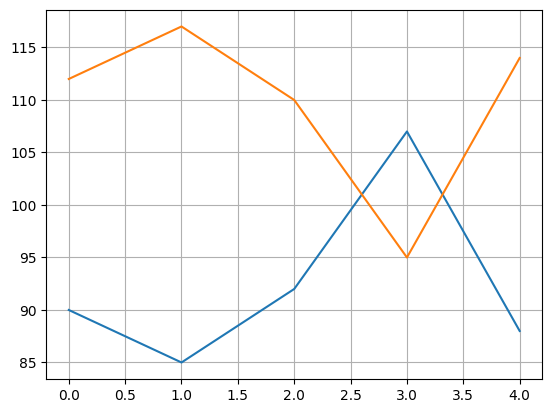

In [47]:
# Analisando os intervalos
plt.plot(pd.crosstab(df_filtrado['liquidez'], df_filtrado['Alvo_Bin']/ df.shape[0]*100))
plt.grid();

In [48]:
df_filtrado.tail()

,Open,High,Low,Close,Adj Close,Volume,Retorn,Alvo,Alvo_Bin,std_5,std_10,Volatilidade,mm_5,mm_10,prop,dir_D,FI,Momentum,Momentum_5,Momentum_10,Tendencia_5,Tendencia_10,EMA_5,EMA_10,liquidez,P/E_5,P/E_10,P/E_15,Return
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-07,13668.070313,13804.509766,13656.730469,13660.719727,13660.719727,5098120000,-0.001339,0.001813,1,0,1,2298.514556,3,3,2,0,1,2,2,1,0,1,3,3,3,4,4,4,-0.001339
2023-07-10,13645.370117,13692.410156,13584.870117,13685.480469,13685.480469,5275390000,0.001813,0.005496,1,0,1,2298.514556,3,3,3,1,2,2,1,2,0,1,3,3,3,0,4,0,0.001813
2023-07-11,13709.809570,13774.830078,13643.320313,13760.700195,13760.700195,4840950000,0.005496,0.011501,1,0,0,2298.514556,3,3,3,1,3,3,1,3,1,1,3,3,3,0,3,4,0.005496
2023-07-12,13915.639648,13963.450195,13842.129883,13918.959961,13918.959961,5230620000,0.011501,0.015778,1,1,0,2298.514556,3,3,2,1,4,3,2,3,1,1,3,3,3,4,3,4,0.011501
2023-07-13,14021.150391,14163.799805,14012.240234,14138.570313,14138.570313,5183560000,0.015778,-0.001759,0,3,1,2298.514556,3,3,4,1,4,4,4,3,1,1,4,3,3,3,3,3,0.015778


# Corrrelação entre as Variaveis

In [49]:
df_filtrado.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Retorn', 'Alvo',
       'Alvo_Bin', 'std_5', 'std_10', 'Volatilidade', 'mm_5', 'mm_10', 'prop',
       'dir_D', 'FI', 'Momentum', 'Momentum_5', 'Momentum_10', 'Tendencia_5',
       'Tendencia_10', 'EMA_5', 'EMA_10', 'liquidez', 'P/E_5', 'P/E_10',
       'P/E_15', 'Return'],
      dtype='object')

In [54]:
variaveis = df_filtrado.iloc[:, 7:df_filtrado.shape[1]]

In [55]:
# correlação
variaveis_corr = variaveis.corr()

In [56]:
# correlação das variaveis com o alvo 

variaveis_corr['Alvo_Bin'].sort_values(ascending = False)

Alvo_Bin        1.000000
Alvo            0.704070
P/E_15          0.085724
P/E_10          0.051997
Momentum_10     0.022485
Tendencia_10    0.013709
P/E_5          -0.004216
Tendencia_5    -0.004750
prop           -0.014053
liquidez       -0.025296
FI             -0.028106
Momentum       -0.033728
mm_10          -0.039349
EMA_10         -0.039349
EMA_5          -0.040754
mm_5           -0.043565
dir_D          -0.045202
Momentum_5     -0.050591
std_5          -0.061834
Return         -0.073939
std_10         -0.081508
Volatilidade         NaN
Name: Alvo_Bin, dtype: float64

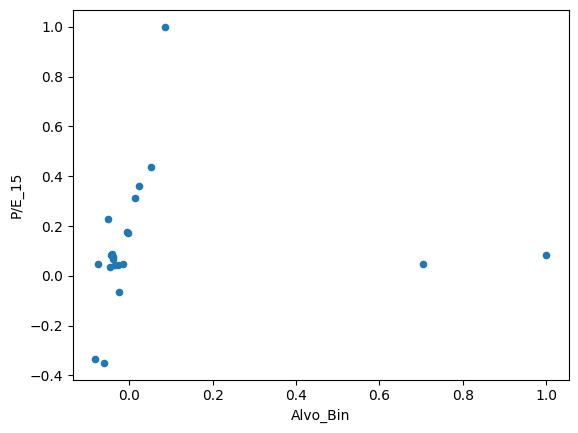

In [70]:
variaveis_corr.plot(kind= 'scatter', x = 'Alvo_Bin', y='P/E_15');

In [62]:
attributes = ['P/E_15', 'P/E_10', 'Momentum_10' , 'std_10', 'std_5']

from pandas.tools.plottin import scatter_matrix
scatter_matrix(variaveis_corr[attributes], figsize = (12,8))

ModuleNotFoundError: No module named 'pandas.tools'

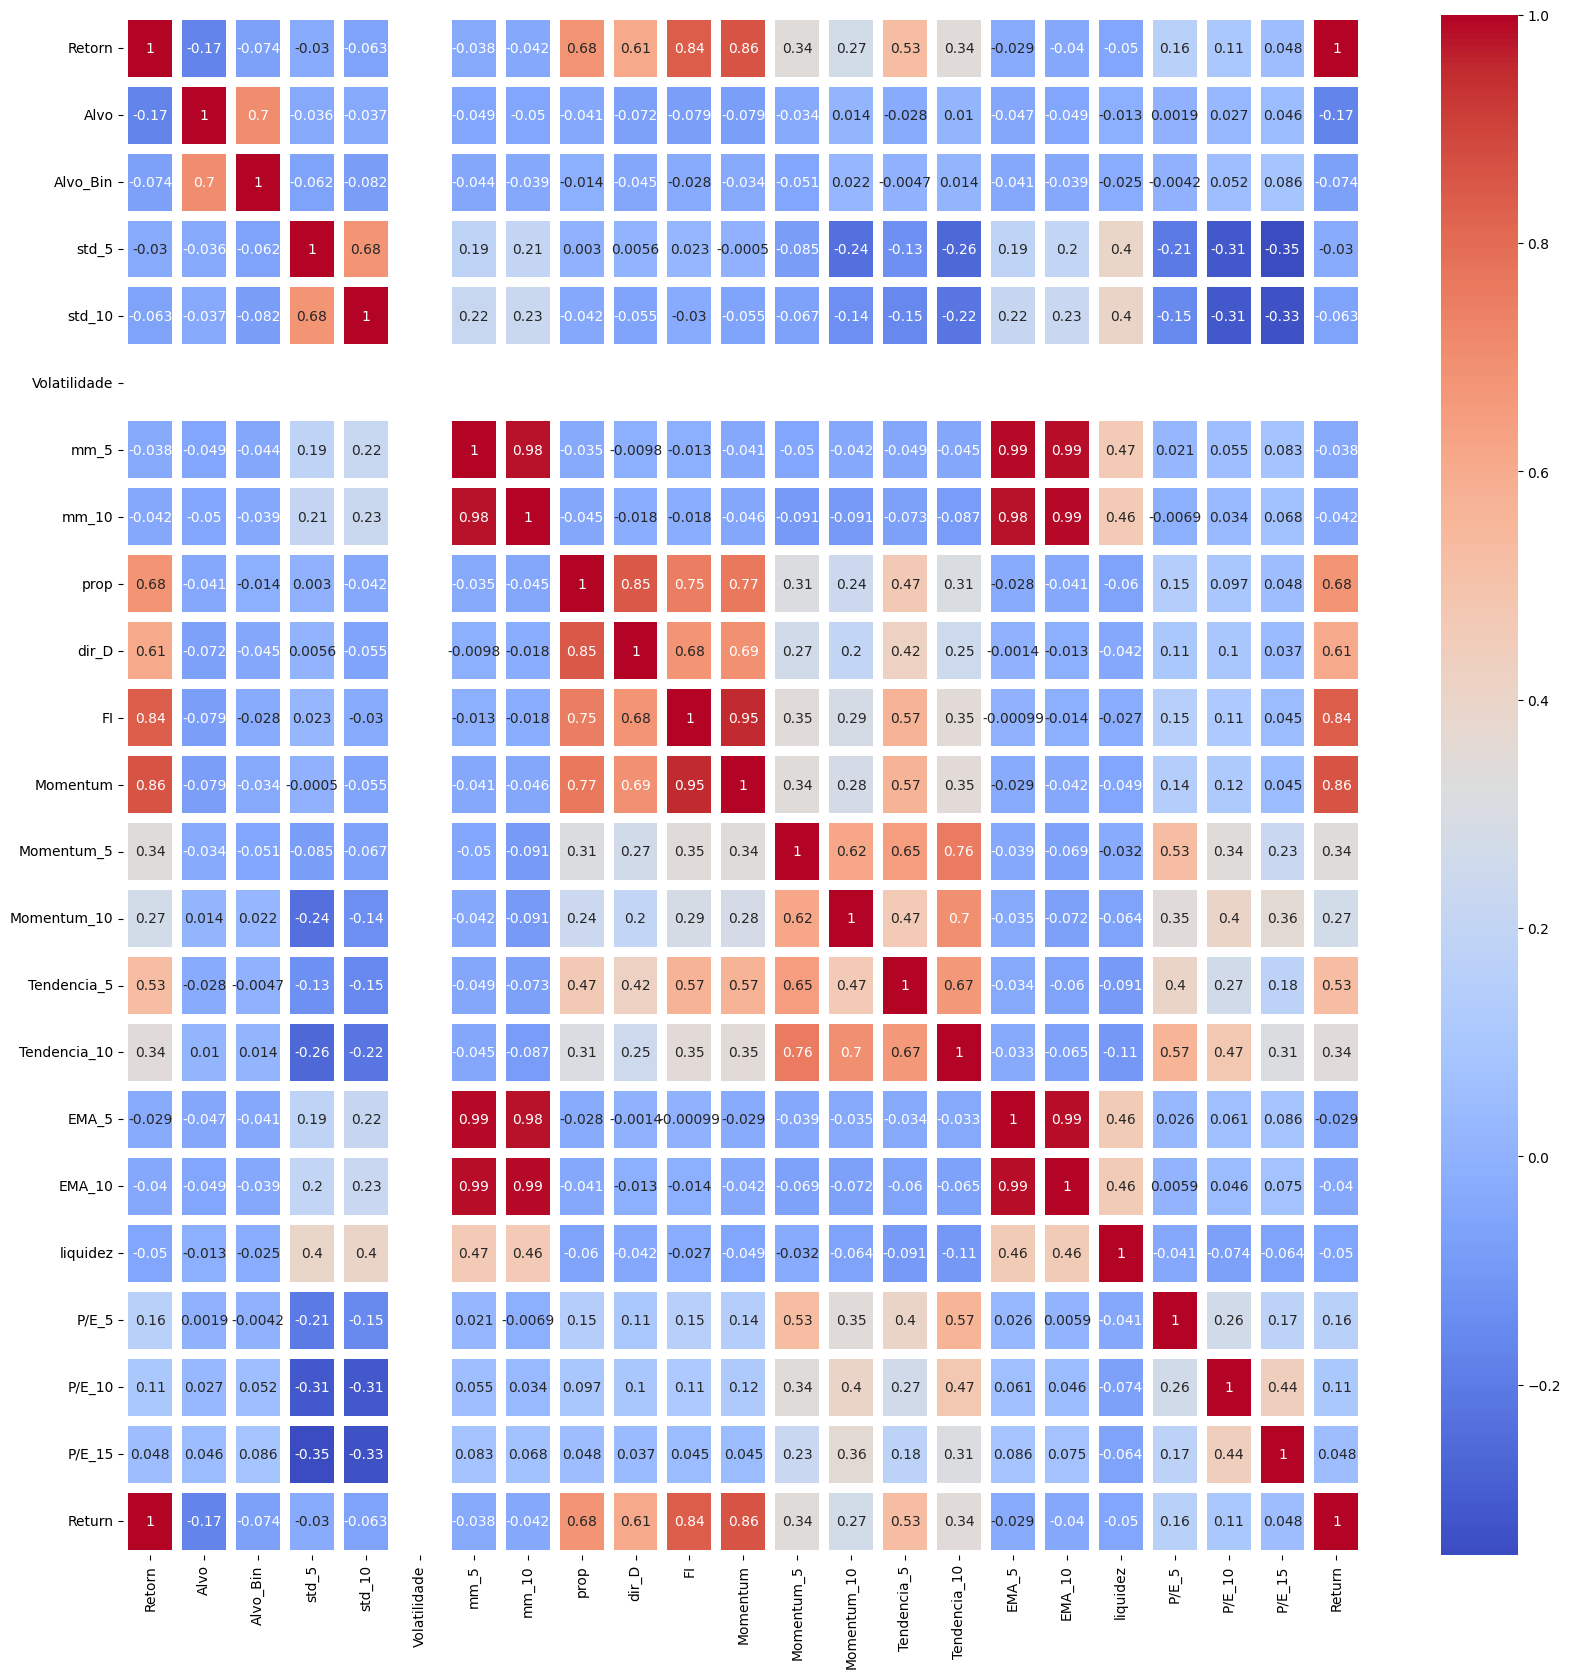

In [53]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(variaveis_corr, cmap = 'coolwarm', annot = True, linewidths = 6, ax=ax);